In this project, we analyze YouTube comments to understand viewer sentiment using two popular NLP tools — VADER and TextBlob. We explore how cleaning techniques affect sentiment classification performance.

# **Installations and getting the comments**


In [ ]:
!pip install youtube-comment-downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
from youtube_comment_downloader import YoutubeCommentDownloader

In [ ]:
yt = YoutubeCommentDownloader()

In [ ]:
comments = yt.get_comments_from_url("https://youtu.be/9RksQ5YT7FM?si=aK5G5E9iabjmZo2X",sort_by = 0)

In [ ]:
comments

<generator object YoutubeCommentDownloader.get_comments_from_url at 0x2ea54f0>

In [ ]:
comments_data = []
for comment in comments:
  comments_data.append(comment['text'])

In [ ]:
comments_data

["✨Link to my SQL e-book: https://imojo.in/rkajq9\n\n✨Link to 'Switch your career easily' e-book: https://imojo.in/1FL7KaG \n(Perfect for anyone willing to switch to a completely new field or to a different company in the Tech World)",
 'It was quite enjoyable to be taught with paper and pen instead of a screen.',
 "I've been struggling with this Regex for many hours , but now its all clear just in 10 minutes .. Thank you",
 'Wow, with a calm voice and temperament, you’ve made it so easy to understand and apply by providing many typical examples....thank you!',
 'wow, this is the best video on regex. every other video teaches you with the simplest example not covering these other points. thank you.',
 'I have 10 years IT experience and so far I never bother learning about regex, yet the irony is i almost use it on day to day basis. I simply Google and copy-paste the regex.\nYour video helped me understand the basic concept very well!',
 'Regex has always been complicated to me but than

In [ ]:
import pandas as pd

In [ ]:
#Converting into a DataFrame for processing
df = pd.DataFrame(comments_data,columns = ['comments'])
df

,comments
0,✨Link to my SQL e-book: https://imojo.in/rkajq...
1,It was quite enjoyable to be taught with paper...
2,I've been struggling with this Regex for many ...
3,"Wow, with a calm voice and temperament, you’ve..."
4,"wow, this is the best video on regex. every ot..."
...,...
611,Can anyone help me in a regex validation\nPlea...
612,"Hi, crack concepts, how to create REGEX for te..."
613,Can you send me that sheet to my postal addres...
614,KOI REGX PADA DO YARRRRRR


# **Text Preprocessing I**

In [ ]:
#Preprocess the comments by removing the url's,punctuations,newlines and white spaces .Lowercasing is also applied
import re
def processing(text):
  text=str(text)
  text = re.sub(r'https?\S+',"",text)
  text = re.sub(r'[^a-zA-Z\s]+',"",text)
  text = re.sub(r'\n',"",text)
  text = text.lower().strip()
  return text
df["cleaned_comment"] = df['comments'].apply(processing)
print(df['cleaned_comment'])

0      link to my sql ebook link to switch your caree...
1      it was quite enjoyable to be taught with paper...
2      ive been struggling with this regex for many h...
3      wow with a calm voice and temperament youve ma...
4      wow this is the best video on regex every othe...
                             ...                        
611    can anyone help me in a regex validationplease...
612    hi crack concepts how to create regex for tele...
613    can you send me that sheet to my postal addres...
614                           koi  regx pada do yarrrrrr
615                                  wornderful job lady
Name: cleaned_comment, Length: 616, dtype: object


In [ ]:
print(df.columns)

Index(['comments', 'cleaned_comment'], dtype='object')


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
# Stopword removal
df["cleaned_comment"] = df["cleaned_comment"].apply(lambda x:" ".join([word for word in x.split() if word not in stop_words]))

In [ ]:
df['cleaned_comment']

,cleaned_comment
0,link sql ebook link switch career easily ebook...
1,quite enjoyable taught paper pen instead screen
2,ive struggling regex many hours clear minutes ...
3,wow calm voice temperament youve made easy und...
4,wow best video regex every video teaches simpl...
...,...
611,anyone help regex validationplease drop comment
612,hi crack concepts create regex telegram bot token
613,send sheet postal address please
614,koi regx pada yarrrrrr


In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x:" ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
df['cleaned_comment']

,cleaned_comment
0,link sql ebook link switch career easily ebook...
1,quite enjoyable taught paper pen instead screen
2,ive struggling regex many hour clear minute thank
3,wow calm voice temperament youve made easy und...
4,wow best video regex every video teach simples...
...,...
611,anyone help regex validationplease drop comment
612,hi crack concept create regex telegram bot token
613,send sheet postal address please
614,koi regx pada yarrrrrr


In [ ]:
from textblob import TextBlob

In [ ]:
#Spelling correction
def spell_check(text):
  try:
    return str(TextBlob(text).correct())
  except:
    return text
df['corrected_spell'] = df['cleaned_comment'].apply(spell_check)

# **Sentiment Analysis using VADER**

In [ ]:
#Sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Obtaining the polarity scores and then sentiment labeling of them
df['Sentiment_scores'] = df['corrected_spell'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment'] = df['Sentiment_scores'].apply(lambda x: "Positive" if x>0.05 else ("Negative" if x< -0.05 else "Neutral" ))

In [ ]:
df

,comments,cleaned_comment,corrected_spell,Sentiment_scores,Sentiment
0,✨Link to my SQL e-book: https://imojo.in/rkajq...,link sql ebook link switch career easily ebook...,link sal ebook link switch career easily ebook...,0.7269,Positive
1,It was quite enjoyable to be taught with paper...,quite enjoyable taught paper pen instead screen,quite enjoyable taught paper pen instead screen,0.4927,Positive
2,I've been struggling with this Regex for many ...,ive struggling regex many hour clear minute thank,give struggling regret many hour clear minute ...,-0.1280,Negative
3,"Wow, with a calm voice and temperament, you’ve...",wow calm voice temperament youve made easy und...,now calm voice temperament you made easy under...,0.6369,Positive
4,"wow, this is the best video on regex. every ot...",wow best video regex every video teach simples...,now best video regret every video teach simple...,0.5994,Positive
...,...,...,...,...,...
611,Can anyone help me in a regex validation\nPlea...,anyone help regex validationplease drop comment,anyone help regret validationplease drop comment,-0.2960,Negative
612,"Hi, crack concepts, how to create REGEX for te...",hi crack concept create regex telegram bot token,hi crack concept create regret telegram not token,-0.1779,Negative
613,Can you send me that sheet to my postal addres...,send sheet postal address please,send sheet postal address please,0.3182,Positive
614,KOI REGX PADA DO YARRRRRR,koi regx pada yarrrrrr,roi red papa yarrrrrr,0.0000,Neutral


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-99-3827848211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Sentiment", palette='Set2')


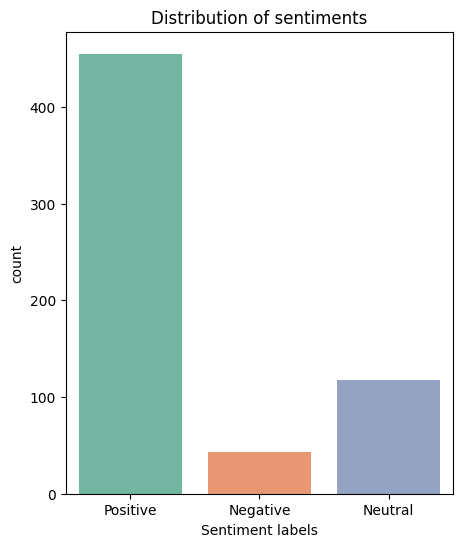

In [ ]:
plt.figure(figsize = (5,6))
sns.countplot(data = df, x = "Sentiment", palette='Set2')
plt.title("Distribution of sentiments")
plt.xlabel("Sentiment labels")
plt.ylabel("Comments")
plt.show()

In [ ]:
#Validating by taking some examples
print("🔹 Positive Comment:\n", df[df['Sentiment'] == 'Positive']['corrected_spell'].iloc[0])
print("\n🔸 Negative Comment:\n", df[df['Sentiment'] == 'Negative']['corrected_spell'].iloc[0])
print("\n🔘 Neutral Comment:\n", df[df['Sentiment'] == 'Neutral']['corrected_spell'].iloc[0])


🔹 Positive Comment:
 link sal ebook link switch career easily ebook perfect anyone willing switch completely new field different company teach world

🔸 Negative Comment:
 give struggling regret many hour clear minute thank

🔘 Neutral Comment:
 exactly


The above results were not really accurate as the classified negative and neutral comments are actually positive comments

# **Sentiment Analysis using TextBlob**

In [ ]:
#Sentiment analysis using textblob
df['Text_polarity'] = df['corrected_spell'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Text_scores'] = df['Text_polarity'].apply(lambda x: "Positive" if x >0 else("Negative" if x<0 else "Neutral"))

In [ ]:
df

,comments,cleaned_comment,corrected_spell,Sentiment_scores,Sentiment,Text_polarity,Text_scores
0,✨Link to my SQL e-book: https://imojo.in/rkajq...,link sql ebook link switch career easily ebook...,link sal ebook link switch career easily ebook...,0.7269,Positive,0.363939,Positive
1,It was quite enjoyable to be taught with paper...,quite enjoyable taught paper pen instead screen,quite enjoyable taught paper pen instead screen,0.4927,Positive,0.500000,Positive
2,I've been struggling with this Regex for many ...,ive struggling regex many hour clear minute thank,give struggling regret many hour clear minute ...,-0.1280,Negative,0.300000,Positive
3,"Wow, with a calm voice and temperament, you’ve...",wow calm voice temperament youve made easy und...,now calm voice temperament you made easy under...,0.6369,Positive,0.266667,Positive
4,"wow, this is the best video on regex. every ot...",wow best video regex every video teach simples...,now best video regret every video teach simple...,0.5994,Positive,1.000000,Positive
...,...,...,...,...,...,...,...
611,Can anyone help me in a regex validation\nPlea...,anyone help regex validationplease drop comment,anyone help regret validationplease drop comment,-0.2960,Negative,0.000000,Neutral
612,"Hi, crack concepts, how to create REGEX for te...",hi crack concept create regex telegram bot token,hi crack concept create regret telegram not token,-0.1779,Negative,0.000000,Neutral
613,Can you send me that sheet to my postal addres...,send sheet postal address please,send sheet postal address please,0.3182,Positive,0.000000,Neutral
614,KOI REGX PADA DO YARRRRRR,koi regx pada yarrrrrr,roi red papa yarrrrrr,0.0000,Neutral,0.000000,Neutral


/tmp/ipython-input-103-1455286482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Text_scores", palette='Set2')


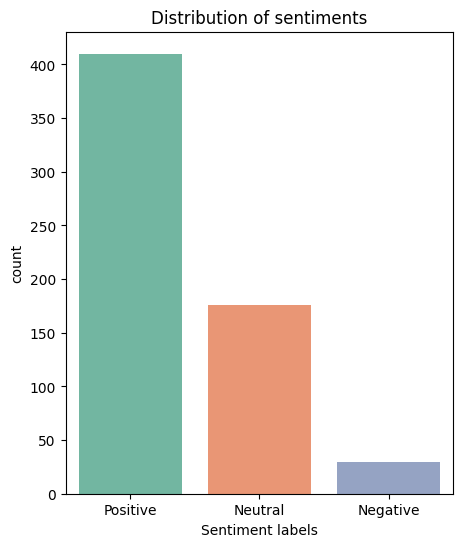

In [ ]:
plt.figure(figsize = (5,6))
sns.countplot(data = df, x = "Text_scores", palette='Set2')
plt.title("Distribution of sentiments")
plt.xlabel("Sentiment labels")
plt.show()

In [ ]:
print("🔹 Positive Comment:\n", df[df['Text_scores'] == 'Positive']['corrected_spell'].iloc[0])
print("\n🔸 Negative Comment:\n", df[df['Text_scores'] == 'Negative']['corrected_spell'].iloc[0])
print("\n🔘 Neutral Comment:\n", df[df['Text_scores'] == 'Neutral']['corrected_spell'].iloc[0])

🔹 Positive Comment:
 link sal ebook link switch career easily ebook perfect anyone willing switch completely new field different company teach world

🔸 Negative Comment:
 can believe winged watched video without really understanding fall video finallythanks much feel less anxious class ll

🔘 Neutral Comment:
 must brigade pelt see contend explicit simple practice e objective you brazil time dificuldade para encontrar up contend odessa qualidade qui see video dixon est tea clark em misha mete


Still there is some misclassifications in the above results

# Wordcloud

In [ ]:
combined_text1 = " ".join(df['corrected_spell'].astype(str))

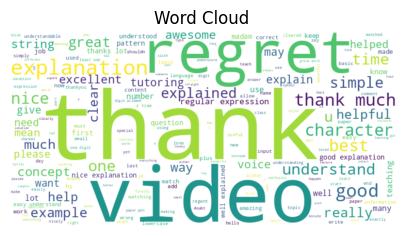

In [ ]:
word_cloud = WordCloud(width = 800, height =400, background_color = "white",colormap = "viridis").generate(combined_text1)
plt.figure(figsize=(5,6))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud ")
plt.show()

# **Text Preprocessing II (using less techniques)**

In [ ]:
df2 = df.copy()
df2

,comments
0,✨Link to my SQL e-book: https://imojo.in/rkajq...
1,It was quite enjoyable to be taught with paper...
2,I've been struggling with this Regex for many ...
3,"Wow, with a calm voice and temperament, you’ve..."
4,"wow, this is the best video on regex. every ot..."
...,...
611,Can anyone help me in a regex validation\nPlea...
612,"Hi, crack concepts, how to create REGEX for te..."
613,Can you send me that sheet to my postal addres...
614,KOI REGX PADA DO YARRRRRR


In [ ]:
#Preprocessing by removing url's and punctuations
import re
def processing(text):
  text=str(text)
  text = re.sub(r'https?\S+',"",text)
  text = re.sub(r'[^a-zA-Z\s]+',"",text)
  return text
df2["cleaned_comment"] = df2['comments'].apply(processing)
print(df2['cleaned_comment'])

0      Link to my SQL ebook \n\nLink to Switch your c...
1      It was quite enjoyable to be taught with paper...
2      Ive been struggling with this Regex for many h...
3      Wow with a calm voice and temperament youve ma...
4      wow this is the best video on regex every othe...
                             ...                        
611    Can anyone help me in a regex validation\nPlea...
612    Hi crack concepts how to create REGEX for tele...
613    Can you send me that sheet to my postal addres...
614                           KOI  REGX PADA DO YARRRRRR
615                                  wornderful job lady
Name: cleaned_comment, Length: 616, dtype: object


In [ ]:
print(df2.columns)

Index(['comments', 'cleaned_comment'], dtype='object')


# Sentiment analysis using VADER

In [ ]:
df2['Sentiment_scores'] = df2['cleaned_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
df2['Sentiment'] = df2['Sentiment_scores'].apply(lambda x: "Positive" if x>0.05 else ("Negative" if x< -0.05 else "Neutral" ))

In [ ]:
df2

,comments,cleaned_comment,Sentiment_scores,Sentiment
0,✨Link to my SQL e-book: https://imojo.in/rkajq...,Link to my SQL ebook \n\nLink to Switch your c...,0.7269,Positive
1,It was quite enjoyable to be taught with paper...,It was quite enjoyable to be taught with paper...,0.4927,Positive
2,I've been struggling with this Regex for many ...,Ive been struggling with this Regex for many h...,0.6956,Positive
3,"Wow, with a calm voice and temperament, you’ve...",Wow with a calm voice and temperament youve ma...,0.8702,Positive
4,"wow, this is the best video on regex. every ot...",wow this is the best video on regex every othe...,0.8885,Positive
...,...,...,...,...
611,Can anyone help me in a regex validation\nPlea...,Can anyone help me in a regex validation\nPlea...,0.4404,Positive
612,"Hi, crack concepts, how to create REGEX for te...",Hi crack concepts how to create REGEX for tele...,0.2732,Positive
613,Can you send me that sheet to my postal addres...,Can you send me that sheet to my postal addres...,0.3182,Positive
614,KOI REGX PADA DO YARRRRRR,KOI REGX PADA DO YARRRRRR,0.0000,Neutral


/tmp/ipython-input-48-751479041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df2, x = "Sentiment", palette='Set2')


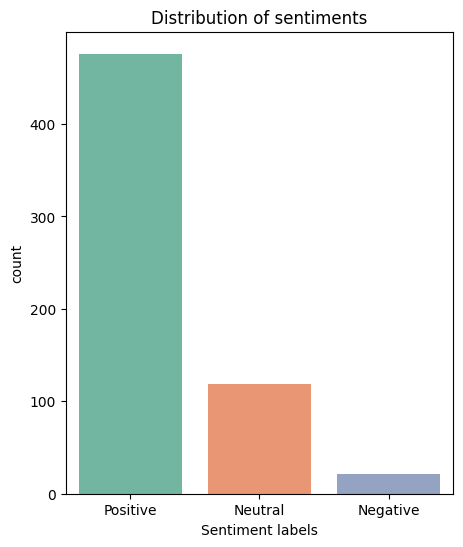

In [ ]:
plt.figure(figsize = (5,6))
sns.countplot(data = df2, x = "Sentiment", palette='Set2')
plt.title("Distribution of sentiments")
plt.xlabel("Sentiment labels")
plt.show()

In [ ]:
print("🔹 Positive Comment:\n", df2[df2['Sentiment'] == 'Positive']['cleaned_comment'].iloc[0])
print("\n🔸 Negative Comment:\n", df2[df2['Sentiment'] == 'Negative']['cleaned_comment'].iloc[0])
print("\n🔘 Neutral Comment:\n", df2[df2['Sentiment'] == 'Neutral']['cleaned_comment'].iloc[0])

🔹 Positive Comment:
 Link to my SQL ebook 

Link to Switch your career easily ebook  
Perfect for anyone willing to switch to a completely new field or to a different company in the Tech World

🔸 Negative Comment:
 no

🔘 Neutral Comment:
 Muito Obrigado pelo seu conteudo A explicao  simples pratica e objetiva Sou do Brasil tive dificuldade para encontrar um conteudo dessa qualidade aqui
Seu vdeo deixou este tema claro em minha mente


The results are much better classified

# Sentiment Analysis using TextBlob

In [ ]:
df2['Text_polarity'] = df2['cleaned_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['Text_scores'] = df2['Text_polarity'].apply(lambda x: "Positive" if x >0 else("Negative" if x<0 else "Neutral"))

In [ ]:
df2

,comments,cleaned_comment,Sentiment_scores,Sentiment,Text_polarity,Text_scores
0,✨Link to my SQL e-book: https://imojo.in/rkajq...,Link to my SQL ebook \n\nLink to Switch your c...,0.7269,Positive,0.363939,Positive
1,It was quite enjoyable to be taught with paper...,It was quite enjoyable to be taught with paper...,0.4927,Positive,0.500000,Positive
2,I've been struggling with this Regex for many ...,Ive been struggling with this Regex for many h...,0.6956,Positive,0.300000,Positive
3,"Wow, with a calm voice and temperament, you’ve...",Wow with a calm voice and temperament youve ma...,0.8702,Positive,0.233333,Positive
4,"wow, this is the best video on regex. every ot...",wow this is the best video on regex every othe...,0.8885,Positive,0.212500,Positive
...,...,...,...,...,...,...
611,Can anyone help me in a regex validation\nPlea...,Can anyone help me in a regex validation\nPlea...,0.4404,Positive,0.000000,Neutral
612,"Hi, crack concepts, how to create REGEX for te...",Hi crack concepts how to create REGEX for tele...,0.2732,Positive,0.000000,Neutral
613,Can you send me that sheet to my postal addres...,Can you send me that sheet to my postal addres...,0.3182,Positive,0.000000,Neutral
614,KOI REGX PADA DO YARRRRRR,KOI REGX PADA DO YARRRRRR,0.0000,Neutral,0.000000,Neutral


/tmp/ipython-input-53-1434545054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df2, x = "Text_scores", palette='Set2')


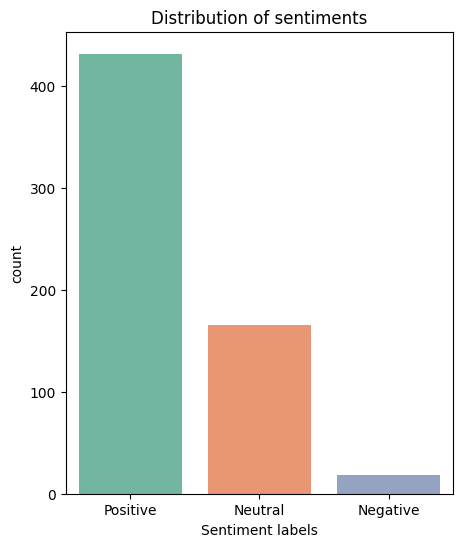

In [ ]:
plt.figure(figsize = (5,6))
sns.countplot(data = df2, x = "Text_scores", palette='Set2')
plt.title("Distribution of sentiments")
plt.xlabel("Sentiment labels")
plt.show()

In [ ]:
print("🔹 Positive Comment:\n", df2[df2['Text_scores'] == 'Positive']['cleaned_comment'].iloc[0])
print("\n🔸 Negative Comment:\n", df2[df2['Text_scores'] == 'Negative']['cleaned_comment'].iloc[0])
print("\n🔘 Neutral Comment:\n", df2[df2['Text_scores'] == 'Neutral']['cleaned_comment'].iloc[0])

🔹 Positive Comment:
 Link to my SQL ebook 

Link to Switch your career easily ebook  
Perfect for anyone willing to switch to a completely new field or to a different company in the Tech World

🔸 Negative Comment:
 Im guilty of that too D

🔘 Neutral Comment:
 Muito Obrigado pelo seu conteudo A explicao  simples pratica e objetiva Sou do Brasil tive dificuldade para encontrar um conteudo dessa qualidade aqui
Seu vdeo deixou este tema claro em minha mente


Classification seems moderate ..a non-english language is classified as Neutral comment possibly due to the inability to classify other languages

# WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
combined_text = " ".join(df2['cleaned_comment'].astype(str))

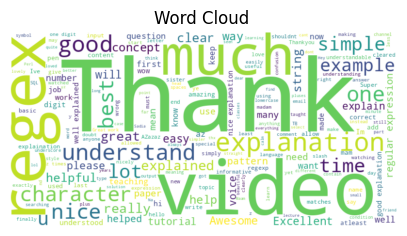

In [ ]:
word_cloud = WordCloud(width = 800, height =400, background_color = "white",colormap = "viridis").generate(combined_text)
plt.figure(figsize=(5,6))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud ")
plt.show()